# Tests of Association: Categorical & Continuous Variables


This lab / homework focuses on tests of association for both categorical and continuous data. The tests you will work on today include: Chi-Square, Correlation, and Regression.  

## Assignment Goals

 - Develop familiarity with how to conduct, examine, and interpret data using the chi-squared test of independence, correlation & regression.
 - Understand the basic logic of how each test works, evaluate test assumptions, visualize relevant data.

You will start by loading a categorical dataset that will allow you to conduct a chi-squared test for independence. 




#  
  
## Chi-Squared Test of Independence


In this lab, we will practice calculating and interpreting the chi-squared test for independence, from start to finish. To do this, we will revisit the cereal dataset that we examined last lab and test a piece of folk wisdom that many parents know, but you might not.... This is about the placement of the cereals on the grocery store shelves. Grocery stores and cereal manufacturers make product placement deals so that their cereals are placed at just the right level to catch the eye of the intended consumer. 

![Cereal Selection](https://raw.github.com/erinheerey/thumbs/master/xcereal1.jpg)

I've edited the cereals dataset so that it contains a new variable "sugar_level". This variable has three levels (Low, Medium and High) based on the grams of sugar per serving the cereal contains. Start by loading the dataset ('cereals2.csv'). To ensure that the data loads when we ask it to, please make sure that your dataset is in the same folder as this Jupyter Notebook on your harddrive. 

To help promote understanding, this and future labs will include a multi-step process designed to bridge the process of understanding a dataset starting with its description and ending with a statistical decision and an interpretation of the outcome. The process we will follow is:

 - Specify your hypotheses
 - Specify analysis details (e.g., the probability of making a Type I Error that you are willing to accept).
 - Summarize the relevant data (e.g., the chi-sq lab will use a contingency table)
 - Plot the data
 - Conduct your hypothesis test
 - Interpret your result and describe it with reference to what your hypothesis means

This week, we will add the library 'SciPy' to our arsenal - to help conduct chi-square, correlation and regression analyses.

In [36]:
# This is the block of import statements
import random
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Load the dataset, print it's header, and check the number of cases it contains.

df = pd.read_csv('cereal2.csv')
print(df.head())
print(f'\nThere are {len(df)} cereals in the dataset.')

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    5.0       6     280        25      3      30  0.33  68.402973   
1    8.0       8     135         0      3      30  1.00  33.983679   
2    7.0       5     320        25      3      30  0.33  59.425505   
3    8.0       0     330        25      3      30  0.50  93.704912   
4   14.0       8       0        25      3      30  0.75  34.384843   

   calories_per_cup sugar_level  
0        212.121212      Medium  
1        120.000000      Mediu

### Research Question: Is a cereal's sugar level associated with the shelf where the cereal is located at the grocery store?  

We might suspect that stores/manufacturers put the high-sugar kid-friendly cereals that they think children will beg their parents for at child-eye level. We will begin by investigating this research question. Start by identifying the null and research hypotheses, and specifying a p-value.

H0: Sugar-level will not be associated with the shelf-location of the cereal.

H1: Sugar-level will be associated with a cereal's shelf-location.

p-value: We will use a threshold of p=.05.

Next, we need to produce and display the contingency table.

In [38]:
# Produce and display a contingency table with the frequency counts.

sugar_level = ['Low', 'Medium', 'High']

cereal_tbl = pd.crosstab(index=df['sugar_level'], columns=df['shelf'], margins=True, margins_name='Total').reindex(sugar_level)
display(cereal_tbl)

shelf,1,2,3,Total
sugar_level,,,,
Low,12,3,10,25
Medium,3,6,17,26
High,5,12,9,26


Now, we will plot these results with a stacked bar chart. 

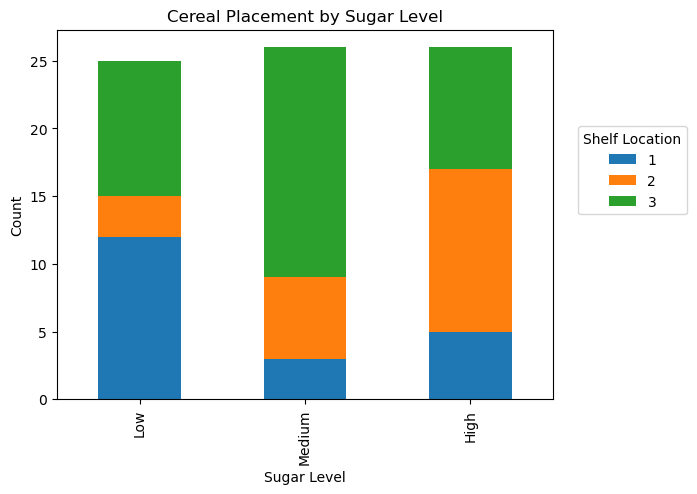

In [39]:
# Plot your table results: Stacked bar chart

cereal_tbl.iloc[0:3, 0:3].plot(kind='bar', stacked='True', xlabel='Sugar Level', ylabel='Count', title='Cereal Placement by Sugar Level')
plt.legend(title='Shelf Location', loc=(1.05, .5))
plt.show()

Based on this representation, does it look like there will be a relationship between sugar level and shelf location?

Answer this question before you move on.

YES, it does! It looks like low-sugar cereals end up on the bottom shelf, high sugar cereals are often placed at kids' eye-level (especially if they are sitting in the shopping cart), and medium sugar cereals, which are often selected by adults, are at adults' eye level.

Now you are ready to conduct and interpret your chi-square - be sure to use the table with the frequency counts and not the proportions in it for your analysis.

In [40]:
# Compute your chi-squared statistic

chi2, p, dof, expected = stats.chi2_contingency(cereal_tbl.iloc[0:3, 0:3])

print(f"chi2_statistic: {chi2:.4f}")
print(f"p-value: {p:.04f}")
print(f"Degrees of Freedom: {dof}")


chi2_statistic: 15.9088
p-value: 0.0031
Degrees of Freedom: 4


Our final step is to intepret the results. Did we find a significant result or not? How can we tell? What do these results mean?

Answer these questions before moving on.

The chi-square statistic (15.91) is statistically significant (p=.003). The observed values in the contingency table differ from what we would expect to see by chance if there were no association between self & sugar. This result suggest that the product placement is deliberate. Check this out the next time you walk down the cereal aisle at your supermarket. 

If you wanted to really confirm this idea, you could print out a list of some of the cereals on the different shelves. That would help you verify or refute this idea.

In [41]:
# Print out a list of the cereals on each shelf.

print(f"Bottom Shelf = {df['name'].loc[df['shelf'] == 1].values}")
print(f"Middle Shelf = {df['name'].loc[df['shelf'] == 2].values}")
print(f"Top Shelf = {df['name'].loc[df['shelf'] == 3].values}")

Bottom Shelf = ['Apple Cinnamon Cheerios' 'Bran Chex' 'Cheerios' 'Corn Chex'
 'Corn Flakes' 'Frosted Flakes' 'Golden Crisp' 'Honey Nut Cheerios'
 'Honey-comb' 'Multi-Grain Cheerios' 'Quaker Oatmeal' 'Rice Chex'
 'Rice Krispies' 'Shredded Wheat' "Shredded Wheat 'n'Bran"
 'Shredded Wheat spoon size' 'Special K' 'Wheat Chex' 'Wheaties'
 'Wheaties Honey Gold']
Middle Shelf = ['Apple Jacks' "Cap'n'Crunch" 'Cinnamon Toast Crunch' 'Cocoa Puffs'
 'Corn Pops' 'Count Chocula' 'Cream of Wheat (Quick)' 'Froot Loops'
 'Frosted Mini-Wheats' 'Fruity Pebbles' 'Golden Grahams'
 'Honey Graham Ohs' 'Kix' 'Life' 'Lucky Charms' 'Maypo' 'Nut&Honey Crunch'
 'Raisin Bran' 'Smacks' 'Strawberry Fruit Wheats' 'Trix']
Top Shelf = ['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Basic 4' 'Bran Flakes' 'Clusters' "Cracklin' Oat Bran"
 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran'
 'Grape Nuts Flakes' 'Grape-Nuts' 

## <font color="blue"> *Homework Problem 1*</font>

You've now been through the process once. It's now your turn to try it out on your own. I've given you a new dataset for this question (https://www.kaggle.com/datasets/kmader/dogs-of-zurich). It is a database of all dog licenses granted to people in the city of Zurich, Switzerland in 2017. As with London Ontario, Zurich requires that pet owners pay a license fee for their dogs each year. This database is contains all dogs whose licenses had been purchased or renewed between January & March of that year. Unlike in London, Zurich taxes dog owners based on the type of dog they own (larger dogs are more expensive). There is a license category for "small dogs" ("kleiner Hund" in German), including breeds like Dachshunds ("Dackel" in German), Chihuahuas, and Beagles. There is also a category for full sized dogs (you might think of these as medium to large dogs such as border collies, boxers, retrievers, and great Danes). These dogs are 'license class I'. Finally, there is a 'license class II', which includes dog breeds that might fall under the dangerous breeds act here (e.g., pit bull terriers). However, there were only 18 of these dogs in the dataset (not enough to statistically analyze) so I have done you a favour and removed them from the dataset. I've changed the variable names from German to English so that you can more easily read them (the dog breeds are still listed in German, as are the coat colours - if you are curious, Google Translate might be helpful). The owner's gender and dog's sex are also listed in English for ease of use. The variables are:

- ID: Owner ID in the database
- AGE_GROUP: Owner's age group
- OWNER_GENDER: Whether the owner identifies as a Man or Woman
- DISTRICT: The section of the city where the owner/dog lives
- BREED1: The primary breed of the dog
- BREED2: The secondary breed of the dog (if multiple); if this is listed as 'NaN' that means no secondary breed is listed.
- LICENSE_TYPE: 'K' for small dog; 'I' for class I dogs
- DOG_BIRTH_YEAR: The dog's birth year
- DOG_SEX: Whether the dog is Male or Female
- COAT_COLOUR: The dog's coat colour(s)

Load the dataset (do not overwrite the cereals dataset you have above - you will use it in the correlation/regression part of the lab) and test the question of whether there is a relationship between owner gender and license type. For example, you might imagine that men are more likely to own full-sized dogs and women might own more small dogs.

Complete a similar hypothesis testing process as above with this new dataset. When you plot your data, you should consider ploting the data in the normalized manner (as we did a previous lab), but when you calculate the chi-squared test, you'll want to ensure that your table contains counts.

In [42]:
# Load the dataset 'dogs.csv', print the header, and check the number of cases. 
# Be sure not to overwrite the above dataframe when you do! 

dfdog = pd.read_csv('dogs.csv')
print(dfdog.head())
print(f'\nThere are {len(dfdog)} dogs in the dataset.')

    ID AGE_GROUP OWNER_GENDER  DISTRICT              BREED1 BREED2  \
0  126     61-70          Man       9.0       Welsh Terrier    NaN   
1  171     61-70          Man       3.0   Berner Sennenhund    NaN   
2  574     61-70        Woman       2.0     Mischling gross    NaN   
3  695     41-50          Man       6.0  Labrador Retriever    NaN   
4  893     61-70        Woman       7.0     Mittelschnauzer    NaN   

  LICENSE_TYPE  DOG_BIRTH_YEAR DOG_SEX    COAT_COLOUR  
0            K            2011  Female  schwarz/braun  
1            I            2009    Male       tricolor  
2            I            2013  Female        schwarz  
3            I            2012  Female          braun  
4            I            2010  Female        schwarz  

There are 7137 dogs in the dataset.


In the code cell below, list your hypotheses and the significance level you will use as your rejection criterion. Normally, we would also state the statistical test we would conduct and how we will clean our dataset but as this is a practice dataset (which is already clean) for a chi-sqared analysis, we don't need to worry about this for now. 

YOUR ANSWER HERE:

**H0:** There is no relationship between owner's gender and dog's sex.

**H1:** There is a relationship between the owner's gender and their dog's sex.

**Significance level of the threshold:** I will use a significance level of p=0.05.

In [92]:
# Now produce and display your NORMALIZED contingency table.

dogn_tbl = pd.crosstab(index=dfdog['DOG_SEX'], columns=dfdog['OWNER_GENDER'], margins=True, margins_name='Total', normalize='index')
display(dogn_tbl)

OWNER_GENDER,Man,Woman
DOG_SEX,,
Female,0.282977,0.717023
Male,0.331165,0.668835
Total,0.306852,0.693148


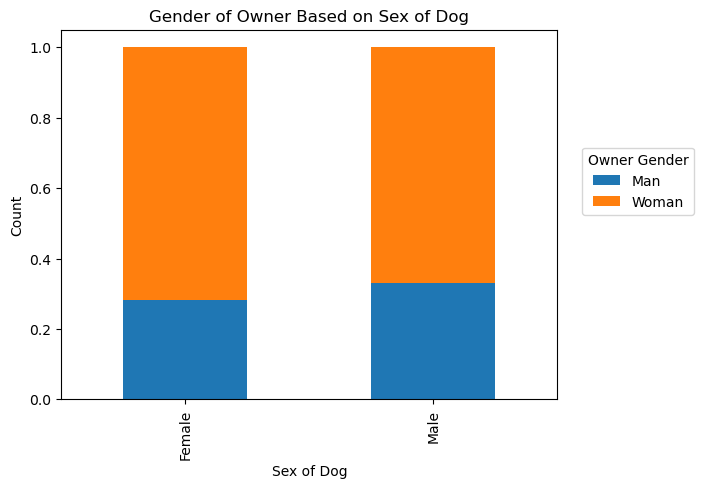

In [93]:
# Now produce and display a stacked bar plot that shows your data.

dogn_tbl.iloc[0:2, 0:2].plot(kind='bar', stacked='True', xlabel='Sex of Dog', ylabel='Count', title='Gender of Owner Based on Sex of Dog')
plt.legend(title='Owner Gender', loc=(1.05, .5))
plt.show()

Learning to anticipate results from a graph of the data is a good skill to develop. Before you conduct your chi-squared test, look carefully at the plot you made and consider whether the chi-square is likely to show a relationship between your variables or not. 

Answer this in the markdown cell below.

YOUR RESPONSE HERE: I think the chi-square is unlikely to show a relationship between my variables because the values appear to be very similar. The difference between the proportions of the dog's sex and the owner's gender is very small and very difficult to see without looking very closely. This means there will most likely be no relationship between my variables.




In [ ]:
# Now, to get ready for your chi-square test, re-build your contingency table with the raw 
# counts (instead of the normalized proportions).

dog_tbl = pd.crosstab(index=dfdog['OWNER_GENDER'], columns=dfdog['LICENSE_TYPE'], margins=True, margins_name='Total')
display(dog_tbl)

OWNER_GENDER,Man,Woman,Total
DOG_SEX,,,
Female,1019,2582,3601
Male,1171,2365,3536
Total,2190,4947,7137


Finally, conduct and interpret your chi-square. Use the markdown cell below to state what your results mean.

In [46]:
# Compute your chi-squared statistic

chi2, p, dof, expected = stats.chi2_contingency(dog_tbl.iloc[0:2, 0:2])

print(f"chi2_statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

chi2_statistic: 19.2522
p-value: 0.0000
Degrees of Freedom: 1


WHAT DO THESE RESULTS MEAN? YOUR ANSWER HERE: 

These results mean that the chi-square statistic of 19.2522 is statistically significant with a p-value of less than 0.01. This means that the null hypothesis should be rejected and that there is a relationship between the owner's gender and their dog's sex. I would assume this means men are more likely to own a dog that is male, and women are more likely to own dogs that are female. 



# 


#  
  
## Correlation & Regression

For this part of the lab, we will return to the cereals dataset we used earlier. Start the lab by checking that you have not overwritten this dataset and that you have it loaded properly. 

For correlation and regression, this is a good sample dataset to use because it has a number of continuous variables in it. This will allow us to test for associations between these variables. In the last lab, we discussed the idea that the "rating" variable in this dataset might have been a rating of the cereal from the magazine Consumer Reports, which compiles ratings on a wide variety of products. We also talked about the fact that we didn't know what that variable meant. Let's look at how different variables in the dataset predict the "ratings" variable, to see if we can figure what it is a rating of. 

In [47]:
# Reload the dataset (if needed) and print it's header.

print(df.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
0    5.0       6     280        25      3      30  0.33  68.402973   
1    8.0       8     135         0      3      30  1.00  33.983679   
2    7.0       5     320        25      3      30  0.33  59.425505   
3    8.0       0     330        25      3      30  0.50  93.704912   
4   14.0       8       0        25      3      30  0.75  34.384843   

   calories_per_cup sugar_level  
0        212.121212      Medium  
1        120.000000      Mediu

Our goal is to understand how different variables in the dataset contribute to the mysterious "rating" variable. If the 'rating' variable is really something to do with the cereal's popularity amongst older people, then one variable we should look at is how much fiber the cereal contains. Rumour has it that older people are interested in things like that.... 

Let's start by looking at fiber in a serving of cereal. We should look at the histogram of this variable and also calculate the mean and standard deviation.


The average grams of fiber per serving: 2.1688, standard deviation = 2.3919.


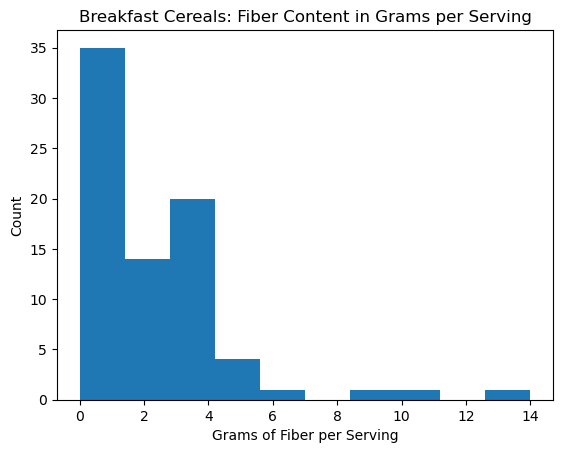

In [48]:
# Mean and fiber
mean_fiber = np.mean(df['fiber'])
sd_fiber = np.std(df['fiber'], ddof=1)

print(f'The average grams of fiber per serving: {mean_fiber:.4f}, standard deviation = {sd_fiber:.4f}.')

# Histogram of fiber
plt.hist(df['fiber'])
plt.ylabel('Count')
plt.xlabel('Grams of Fiber per Serving')
plt.title('Breakfast Cereals: Fiber Content in Grams per Serving')
plt.show()

If Consumer Reports readers really do care about how much fiber is in their cereal, they should rate cereals with higher amounts of fiber more positively. We will produce a plot of this relationship. The plot we produce will be a "joint plot" that shows both a histogram of each variable and a scatter plot of the relationship between them.

Before we produce the plot, we will want to specify our hypotheses. Our significance criterion will be set to p=.05.

- **H1:** There will be a positive correlation between the amount of fiber in a serving of cereal and how it is rated in Consumer Reports. 
- **H0:** There will be no relationship (or a negative relationship) between cereal fiber content and rating. 


The average cereal rating is 42.67, standard deviation = 14.05


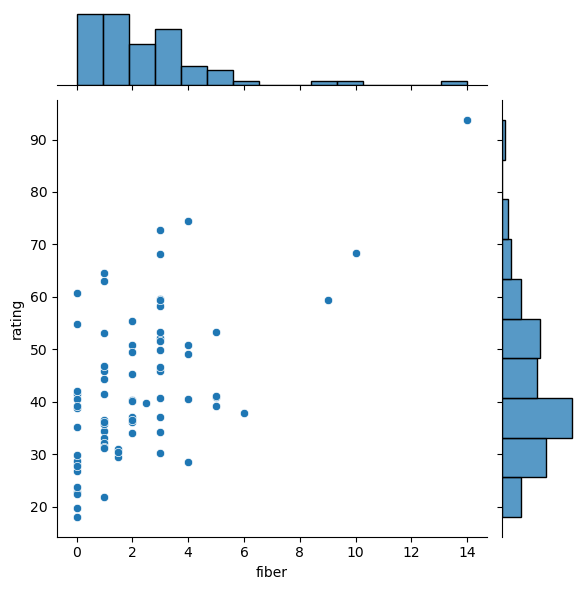

In [49]:
# Descriptive statistics for RATING
print(f'The average cereal rating is {np.mean(df["rating"]):.2f}, standard deviation = {np.std(df["rating"], ddof=1):.2f}')

# Joint plot of the data.

sns.jointplot(data=df, x='fiber', y='rating')
plt.show()


Interesting! It certainly looks like the fiber content, positively correlates with the rating. However, we also probably want to get a proper correlation coefficient for this relationship. Let's calculate the correlation now. 

In [50]:
# Calculate the relevant pearson correlation
# fiber (x) and rating (y)

r, p = stats.pearsonr(df['fiber'], df['rating'])
print(f"r(fiber, rating) = {r:.4f}, p ={p}")

r(fiber, rating) = 0.5862, p =2.122084335441679e-08


As we would expect from the plot, the correlation is quite strong and certainly statistically significant. But look at the plot above carefully. Do you see any outliers? We know that correlation is sensitive to outliers. There is one extreme outlier on the fiber variable and two other datapoints that aren't quite as extreme but also look like outliers.

Use a boxplot to check their status. 

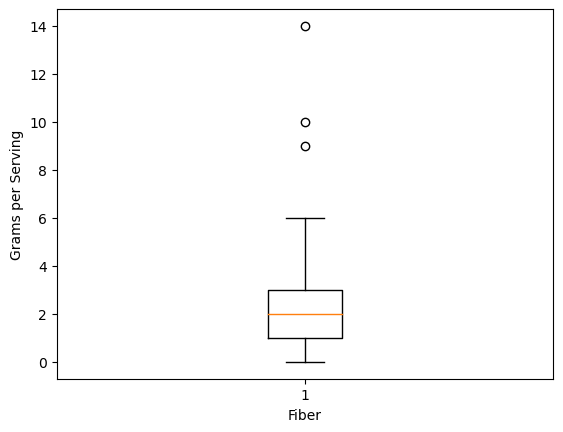

In [51]:
# Generate a boxplot of FIBER to look at the outliers. If there are outliers, re-do the 
# joint plot and correlation coefficient to check the relationship excluding these influential points.

plt.boxplot(df['fiber'])
plt.xlabel('Fiber')
plt.ylabel('Grams per Serving')
plt.show()

Which cereals are outliers? Print those out below.

In [52]:
# Print the name of the outliers.

print(f'Outliers: {df["name"].loc[df["fiber"] > 8].values}')

Outliers: ['100% Bran' 'All-Bran' 'All-Bran with Extra Fiber']


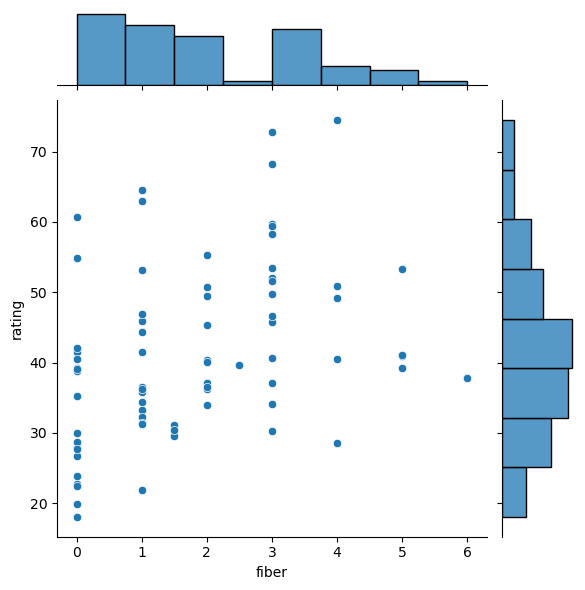

r(fiber, rating) = 0.3835, p =0.0007446183006611304


In [ ]:
# Produce the joint plot (as above), excluding the outliers
# Joint plot of the data.

sns.jointplot(data=df[df['fiber'] < 8], x='fiber', y='rating')
plt.show()

# Calculate the relevant pearson correlation excluding the outliers
# fiber (x) and rating (y)

r, p = stats.pearsonr(df['fiber'].loc[df['fiber'] < 8], df['rating'].loc[df['fiber'] < 8])
print(f"r(fiber, rating) = {r:.4f}, p ={p:.10f}")

Now, we should interpret our results. 

Based on what the data show, the Consumer Reports rating of the cereal is positively correlated with the grams of fiber per serving. Even though the correlation is substantially smaller after removing the influential outliers, the results are still indicative of a significant positive relationship between the fiber content in a serving of cereal and the "rating". This suggests that the people who generated the ratings think that fiber is an important element of breakfast cereals.

## <font color="blue"> *Homework Problem 2*</font>

Now that you've had a chance to see how these correlations are produced and interpreted, your job is to figure out which two variables correlate most strongly with the cereals' rating variable. Here, you do not need to worry about a full hypothesis testing procedure. Instead, you are looking to find the two variables that are most strongly correlated with cereal rating. After looking at the data, what do you think the 'rating' variable is telling us?

To get you started, we will do a visualization together.

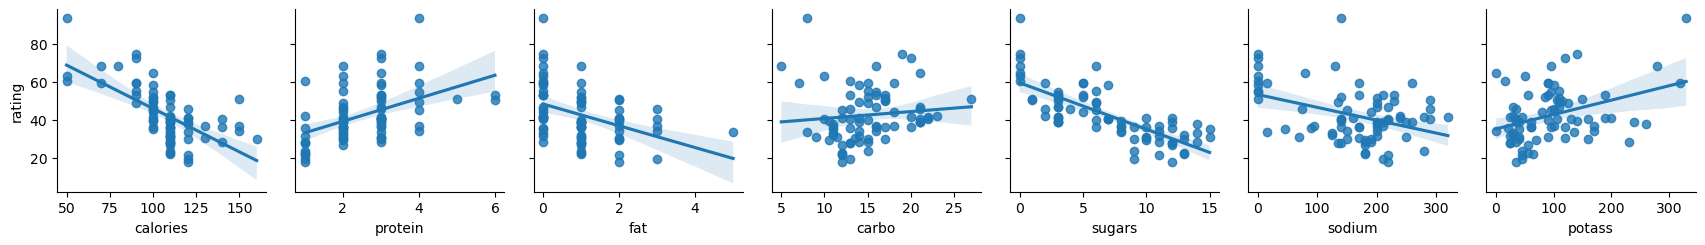

In [80]:
# Define a new variable that contains a list of the variables that you want to examine. 
# Remember that only certain types of variables should be examined with correlation. Please refresh your 
# memory about what these are before you complete this exercise.

tested_vars = ['calories', 'protein', 'fat', 'carbo', 'sugars', 'sodium', 'potass']

g = sns.PairGrid(data=df, y_vars='rating', x_vars=tested_vars)
g.map(sns.regplot)

plt.show()

Based on what you see in the plot above, which variables look like they will correlate most strongly with ratings?
Answer this question in the box below.

YOUR RESPONSE HERE.

ANSWER:

Calories and sugars look like they are very strongly correlated with the cereal rating. Calories and cereal rating have a correlation of -.60, and sugars and cereal rating have a correlation of -.77. They both appear to have less outliers and are more concentrated about the linear regression line. The other variables have scatterplots with points that appear to be more scattered and less close to the line of best fit. This means that on average, Consumer Reports survey respondents tend to prefer cereals with less sugar and fewer calories per serving.

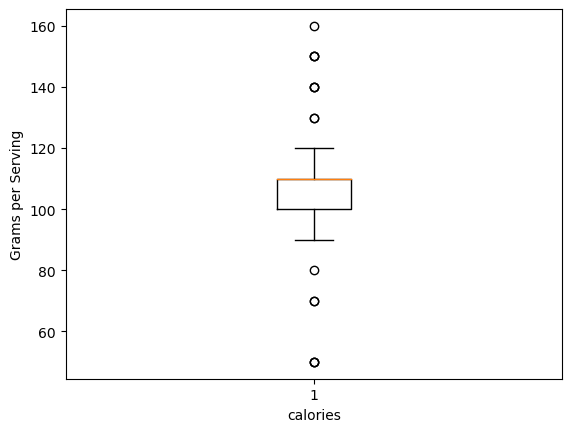

r(calories, rating) = -0.4706, p =3.4535410164343754e-05


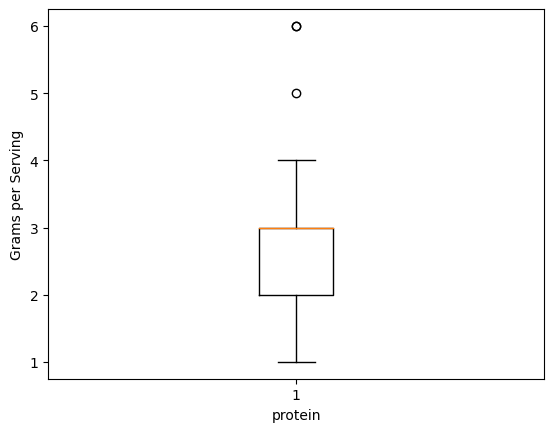

r(protein, rating) = 0.4917, p =8.649933860648513e-06


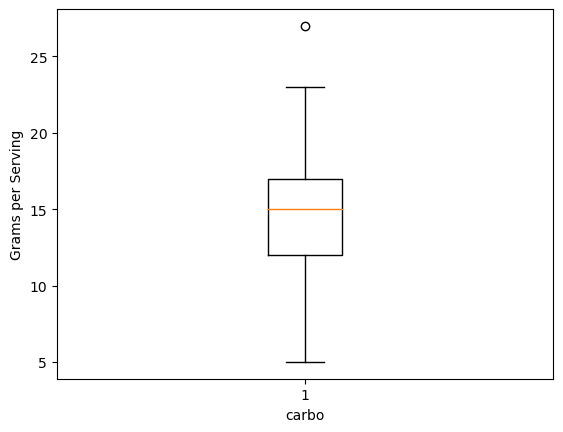

r(carbo, rating) = 0.0887, p =0.44602176142472394


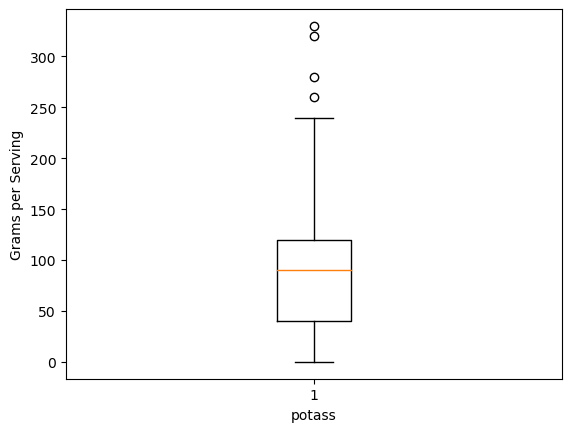

r(potass, rating) = 0.1766, p =0.13508110733509693


In [100]:
#Calculate/print your correlations. 
# If there are any, be sure to account for any outliers on the 'rating' variable in your results 
# (because of how the distributions work - some of these variables are counts), outlier detection via boxplot 
# won't work very well for the other variables.


#variables with outliers
plt.boxplot(df['calories'])
plt.xlabel('calories')
plt.ylabel('Grams per Serving')
plt.show()

r, p = stats.pearsonr(df['calories'].loc[df['calories'] > 85], df['rating'].loc[df['calories'] > 85])
print(f"r(calories, rating) = {r:.4f}, p ={p}")

plt.boxplot(df['protein'])
plt.xlabel('protein')
plt.ylabel('Grams per Serving')
plt.show()

r, p = stats.pearsonr(df['protein'].loc[df['protein'] < 5], df['rating'].loc[df['protein'] < 5])
print(f"r(protein, rating) = {r:.4f}, p ={p}")

plt.boxplot(df['carbo'])
plt.xlabel('carbo')
plt.ylabel('Grams per Serving')
plt.show()

r, p = stats.pearsonr(df['carbo'].loc[df['carbo'] < 25], df['rating'].loc[df['carbo'] < 25])
print(f"r(carbo, rating) = {r:.4f}, p ={p}")

plt.boxplot(df['potass'])
plt.xlabel('potass')
plt.ylabel('Grams per Serving')
plt.show()

r, p = stats.pearsonr(df['potass'].loc[df['potass'] < 250], df['rating'].loc[df['potass'] < 250])
print(f"r(potass, rating) = {r:.4f}, p ={p}")

In [101]:
#variables WITHOUT outliers

r, p = stats.pearsonr(df['fat'], df['rating'])
print(f"r(fat, rating) = {r:.4f}, p ={p}")

r, p = stats.pearsonr(df['sugars'], df['rating'])
print(f"r(sugars, rating) = {r:.4f}, p ={p}")

r, p = stats.pearsonr(df['sodium'], df['rating'])
print(f"r(sodium, rating) = {r:.4f}, p ={p}")

r(fat, rating) = -0.4093, p =0.00021902783751020507
r(sugars, rating) = -0.7633, p =6.996558876347872e-16
r(sodium, rating) = -0.4013, p =0.0002979863125537897


Based on the correlations you calculated, which two variables are most strongly correlated with rating? Based on the correlations as a set, what do you think the rating variable is telling us?
Answer in the markdown cell below.

YOUR RESPONSE HERE.

Based on the correlations I calculated, the two variables that are most strongly correlated with rating are sugars and protein, because they have the smallest p-values. The smaller the p-value, the stronger the evidence is to reject the null hypothesis and it therefore means that the variables are more strongly correlated. Based on the correlations as a set, the rating variable is telling us that potassium and carbohydrates are very likely not related to the rating. It also tells us about the strength of the relationships, which we can interpret based on the r-value. The r-value also tells us whether there is a negative or positive relationship, based on whether the r-value is negative or positive. Sugars have a strong negative relationship with the rating, with an r-value of -0.7633. Protein has a slightly weaker positive relationship with the rating, with an r-value of 0.4917.




## 
## Regression

For this section of HW4, we will switch to a new dataset, in which you may explore factors affecting student performance. This is a dataset that comes from Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression). It is relatively simple and certainly useful for regression. However, this dataset is synthetic (i.e., made up). As you go through the dataset, see if anything looks unusual about any of the variables in the dataset.

The dataset contains the following variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day
- Sample Question Papers Practiced: The number of sample question papers the student practiced.
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

We will start by loading the dataset and then move on to our hypotheses, standard descriptive statistics, and visualizatons. 

In [82]:
df2 = pd.read_csv('Student_Performance.csv')
print(df2.head())

print(f'\nThere are {len(df2)} students in the dataset.')

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

There are 10000 students in the dataset.


'Performance Index' is the outcome variable in this dataset. For this first analysis, we are going to use 'Hours Studied' as a predictor of student performance. Read the hypotheses below and then compute the descriptive ststistics for both variables, along with a plot of their relationship.

Hypotheses

- **H1:** Hours studied will positively predict student performance.
- **H0:** Hours studied will show no relationship or a negative relationship to student performance.

Because this is a large dataset, we will select a significance criterion of p=.01

The average of Performance Index is: 55.2248, standard deviation = 19.2126.
The average hours studied is 4.9929, standard deviation = 2.5893.


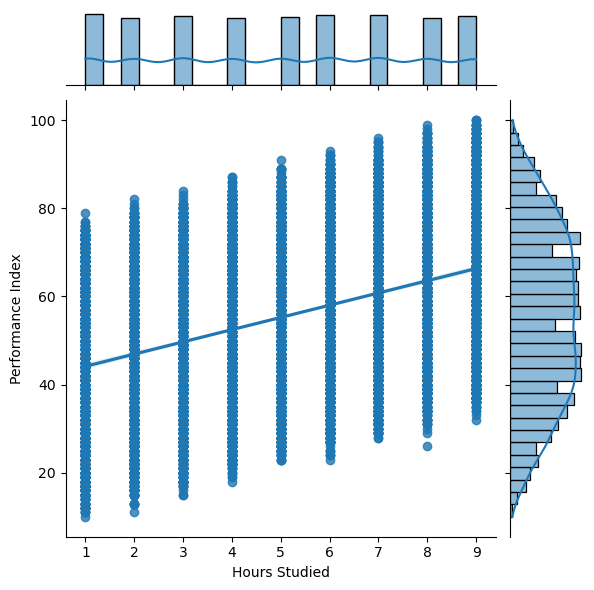

In [83]:
# Descriptive statistics for Performance Index
print(f'The average of Performance Index is: {np.mean(df2["Performance Index"]):.4f}, standard deviation = {np.std(df2["Performance Index"], ddof=1):.4f}.')

# Descriptive statistics for Hours Studied
print(f'The average hours studied is {np.mean(df2["Hours Studied"]):.4f}, standard deviation = {np.std(df2["Hours Studied"], ddof=1):.4f}.')

# Joint plot of the data - with the regression line added.
sns.jointplot(data=df2, x='Hours Studied', y='Performance Index', kind='reg')
plt.show()

In [84]:
# Now compute the linear regression.
# Linear regression function.

results = stats.linregress(df2['Hours Studied'], df2['Performance Index'])

print(f"Hours Studied & Performance Index: Slope = {results.slope:.4f}, Intercept = {results.intercept:.4f}")
print(f'The correlation between Hours Studied & Performance Index is: {results.rvalue:.4f}.')
print(f'The p-value of this relationship is: {results.pvalue}')

Hours Studied & Performance Index: Slope = 2.7731, Intercept = 41.3792
The correlation between Hours Studied & Performance Index is: 0.3737.
The p-value of this relationship is: 0.0


##### Decision & Interpretation

It is clear that there is a moderate positive relationship between hours of study and performance (i.e., we should reject H0). The more hours a student spends studying, the better their performance index. This seems like the sort of thing we might expect in real life. 
## 
## <font color="blue"> *Homework Problem 3a*</font>

Interestingly, the data give us several clues that they are simulated. Look at the plot above and see if you can make a guess what two of those clues might be? Answer this question in the markdown cell below.

YOUR RESPONSE HERE.


**Clue 1:** 'Hours Studied' was sampled from a uniform distribution, but in real life, we would expect this to be normally distributed. Only a few students wouldn't study at all and only a few would study really hard. Most would study at some average amount of hours.

**Clue 2:** The data are too perfect, the assumption of homoscedasticity is perfectly achieved, even at the tails of the distribution. This is very rare in real life.


## <font color="blue"> *Homework Problem 3b*</font>

#### Regression equation

In the cell below, write the regression equation that will allow you to predict Student Performance Index from your explanatory variable. Interpret this in words. Does this look like it indicates a strong or a weak relationship?
 

YOUR RESPONSE HERE.

y_hat = 41.38 + 2.77X

At 0 hours of study, the avergage student has a performance index of 41.38. Each additional hour of study increases performance index by 2.77 points, on average.

This makes it look like it indicates a weak relationship, because the slope is a relatively small value. 

Now we will calculate the coefficient of determination which will give us a metric of the strength of this relationship. We will use the 'r' above, as generated by the regression. Note: squaring r is only one way to calculate the coefficient of determination and in only works under certain conditions (which we happen to meet in this analysis). 

In [ ]:
# Calculate the coefficient of determination.

print(f"R-squared: {results.rvalue ** 2:.4f}")
print(f"This result suggests that about 14% of variance in performance is accounted for by the relationship between student performance and hours studied.")

R-squared: 0.1397


## <font color="blue"> *Homework Problem 4*</font>

Run a regression on your own. Use 'Sleep Hours' as your predictor variable. As above, 'Performance Index' will be the outcome variable. Be sure you complete all the usual steps in the hypothesis testing process, including calculating the coefficient of determination (our measure of effect size). Be sure to interpret your findings in the markdown cell below.

**Hypotheses:**

- H0: There will be no relationship between Sleep Hours and Performance Index.
- H1: There will be a relationship between Sleep Hours and Performance Index.

**Significance level:** The significance level I will use is p = 0.05.

The average hours of sleep is 6.5306 and the standard deviation is 1.6959.


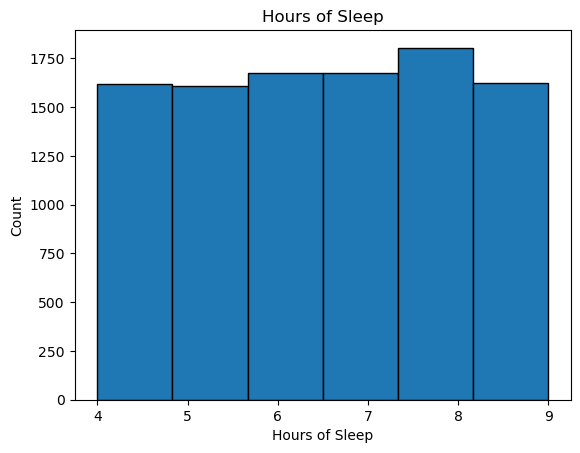

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

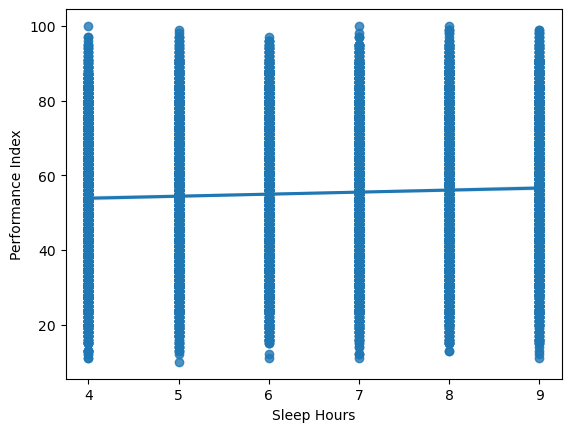

In [ ]:
# Descriptive statistics & plot for Sleep Hours
mean_sleep = np.mean(df2['Sleep Hours'])
sd_sleep = np.std(df2['Sleep Hours'], ddof=1)

print(f'The average hours of sleep is {mean_sleep} and the standard deviation is {sd_sleep:.4f}.')

sns.jointplot(data = df2, x = 'Sleep Hours', y = 'Performance Index', kind = 'reg')
plt.show()

In [ ]:
# Linear regression function.

results_sleep = stats.linregress(df2['Sleep Hours'], df2['Performance Index'])
print(results_sleep)
print(f'The linear regression function for Sleep Hours against Performance Index is y = {results_sleep.slope} x + {results_sleep.intercept}')
print(f'The p-value is: {results.pvalue:.10f}')
print(f'R-squared (coefficient of determination): {results.rvalue**2:.4f}')

LinregressResult(slope=0.5449945877536635, intercept=51.665658345215924, rvalue=0.04810583543435258, pvalue=1.4885369617939716e-06, stderr=0.113170898429829, intercept_stderr=0.7635841041786439)
The linear regression function for Sleep Hours against Performance Index is y = 0.5449945877536635 x + 51.665658345215924


**Interpret your results here:**

Statistical decision: As the p-value is below my threshold of 0.05, it is in the rejection region. The null hypothesis is rejected and the alternate hypothesis is accepted. However, the r-value is 0.0481, which means there is a very weak relationship between Sleep Hours and Performance Index.

Interpretation: This linear regression shows that there is a very weak relationship between the two variables. The graph appears to show that there is a relationship between Sleep Hours and Performance Index up until 8 hours, because the performance index for 9 hours is lower than the performance index for 8 hours. This means that sleep has little impact on a student's performance.

As sleep hours are sampled from a uniform distribution, it is not a reflection of real life students' sleep schedules. Therefore, it may be a good recommendation to get more sleep for real life situations.